In [42]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# чтобы вывести всю таблицу на экран
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

In [3]:
# creating a dataframe
app_stats = pandas.read_csv(
    "C:\\Users\\HOME\\ya_datasets\\app_stats.csv",
index_col='week_number')
print(app_stats)

             installs  payments  ad_campaign
week_number                                 
0               29486      3541            0
1               30830      4275            0
2               31970      4404            0
3               34361      4463            0
4               33968      4358            0
5               34912      4310            0
6               35118      4427            0
7               49296      6836            1
8               35969      4366            0
9               50182      6426            1
10              37169      4774            0
11              36579      5082            0
12              38198      5025            0
13              55226      6420            1
14              38932      4804            0
15              51316      6299            1
16              38067      4884            0
17              57437      6146            1
18              39399      5084            0
19              53167      6276            1
20        

In [4]:
app_stats.columns

Index(['installs', 'payments', 'ad_campaign'], dtype='object')

In [5]:
app_stats.head()

,installs,payments,ad_campaign
week_number,,,
0,29486,3541,0
1,30830,4275,0
2,31970,4404,0
3,34361,4463,0
4,33968,4358,0


# Основные бизнес-вопросы

## 1) Сколько всего пользователей у «Книжного грызуна»

In [10]:
total_users = app_stats["installs"].sum()
print("Общее количество пользователей (по установкам):", total_users)

Общее количество пользователей (по установкам): 2207337


### Это суммарное число установок за период, а не число уникальных пользователей.

## 2) Общее количество установок за изучаемый период

In [12]:
total_installs = app_stats["installs"].sum()
print("Общее количество установок:", total_installs)


Общее количество установок: 2207337


## 3) Сколько денег заработало приложение

#### Средняя конверсия за год

Не можем пока узнать: требуется цена установки приложения.

In [25]:
# Средняя конверсия за год
avg_conversion = app_stats["payments"].sum() / app_stats["installs"].sum()
print("Средняя конверсия за год:", avg_conversion)

Средняя конверсия за год: 0.126526669919455


In [27]:
# Доход от одной установки
revenue_per_install = avg_conversion * 600
print("Доход от одной установки:", revenue_per_install)

Доход от одной установки: 75.916001951673


## 4) Общее количество платежей за изучаемый период

In [17]:
total_payments = app_stats["payments"].sum()
print("Общее количество платежей:", total_payments)

Общее количество платежей: 279287


## 5) Общую конверсию за изучаемый период: отношение суммарного числа платежей ко всем установкам

In [18]:
overall_conversion = app_stats["payments"].sum() / app_stats["installs"].sum()
print("Общая конверсия за период:", overall_conversion)

Общая конверсия за период: 0.126526669919455


## 6) Конверсию по неделям

In [28]:
app_stats["weekly_conversion"] = (
    app_stats["payments"] / app_stats["installs"]
)

print(app_stats["weekly_conversion"])

week_number
0     0.120091
1     0.138664
2     0.137754
3     0.129886
4     0.128297
5     0.123453
6     0.126061
7     0.138673
8     0.121382
9     0.128054
10    0.128440
11    0.138932
12    0.131551
13    0.116250
14    0.123395
15    0.122749
16    0.128300
17    0.107004
18    0.129039
19    0.118043
20    0.128935
21    0.127577
22    0.124201
23    0.134073
24    0.126792
25    0.125818
26    0.135536
27    0.128526
28    0.124578
29    0.133379
30    0.128868
31    0.111959
32    0.125078
33    0.104295
34    0.131338
35    0.136041
36    0.129372
37    0.135112
38    0.135548
39    0.128214
40    0.134144
41    0.122889
42    0.123186
43    0.133122
44    0.135987
45    0.120498
46    0.128131
47    0.132071
48    0.130854
49    0.119030
50    0.120828
51    0.121148
Name: weekly_conversion, dtype: float64


## 7) Количество рекламных кампаний за изучаемый период

In [23]:
total_ad_campaigns = app_stats["ad_campaign"].sum()
print("Общее количество рекламных кампаний:", total_ad_campaigns)

Общее количество рекламных кампаний: 10


## 8) Окупилась ли определённая рекламная кампания

In [29]:
print(
    f"Средняя конверсия за год: {avg_conversion:.2%}\n"
    f"Доход от одной установки: {revenue_per_install:.2f} руб."
)


Средняя конверсия за год: 12.65%
Доход от одной установки: 75.92 руб.


### В среднем одна установка приложения приносит «Книжному грызуну» почти 76 рублей. Это на 16 рублей больше, чем стоимость рекламы, — значит, рекламные кампании окупаются. Но на самом деле не всё так просто.

### Считаем конверсию последних 8 недель, чтобы отследить изменения этого показателя во времени и исключите риск выбрать для оценки неделю, которая слишком сильно отличается от остальных.

In [33]:
app_stats["weekly_conversion"] = (
    app_stats["payments"] / app_stats["installs"]
)

print((app_stats["weekly_conversion"]).tail(8))

week_number
44    0.135987
45    0.120498
46    0.128131
47    0.132071
48    0.130854
49    0.119030
50    0.120828
51    0.121148
Name: weekly_conversion, dtype: float64


Результаты не слишком отличаются от среднегодовой конверсии в ~12,7%. Осталось убедиться, что при таких значениях средний доход от одной установки превышает стоимость привлечения.

In [34]:
print((app_stats["weekly_conversion"]).tail(8) * 600)

week_number
44    81.592134
45    72.299082
46    76.878694
47    79.242640
48    78.512340
49    71.418105
50    72.496653
51    72.688851
Name: weekly_conversion, dtype: float64


### Вывод: гипотеза об отличии среднегодовой конверсии от актуальной неверна.

In [37]:
app_stats.head()

,installs,payments,ad_campaign,weekly_conversion
week_number,,,,
0,29486,3541,0,0.120091
1,30830,4275,0,0.138664
2,31970,4404,0,0.137754
3,34361,4463,0,0.129886
4,33968,4358,0,0.128297


### Результаты эксперимента таковы: в каждую из последних восьми недель конверсия установок в покупки «Книжного грызуна» примерно одинакова и выше 10%, а средний доход от одной установки — больше 60 рублей.

# Отличается ли конверсия «рекламных» пользователей от обычной?

In [43]:
plt.rcParams['figure.figsize'] = (6, 8) # указываем размер визуализации

<Axes: ylabel='week_number'>

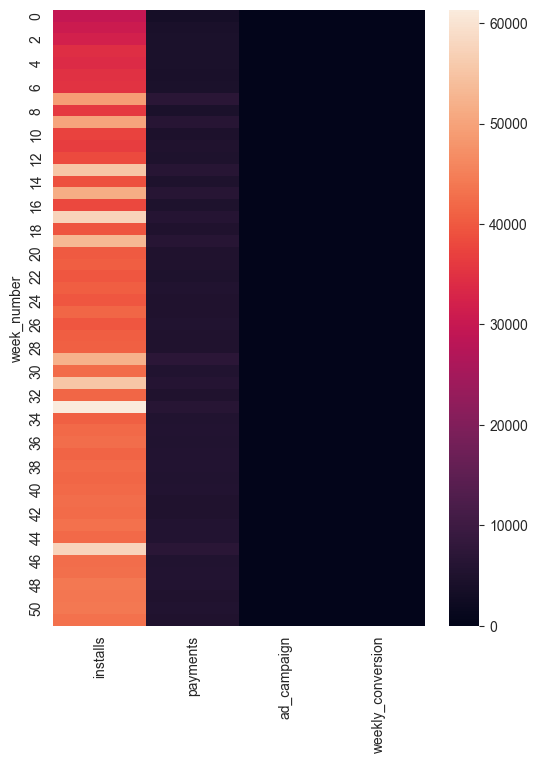

In [44]:
sns.heatmap(app_stats)